In [36]:
# import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# import the data and check features
data = pd.read_csv('weather_data.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [3]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [3]:
# data size
data.size

8784

In [4]:
# data shape
data.shape

(366, 24)

In [5]:
# data columns
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

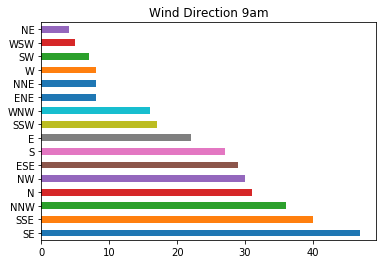

In [6]:
# plot a bar graph for winddir9am
data.WindDir9am.value_counts().plot(kind='barh')
plt.title('Wind Direction 9am')
plt.show()

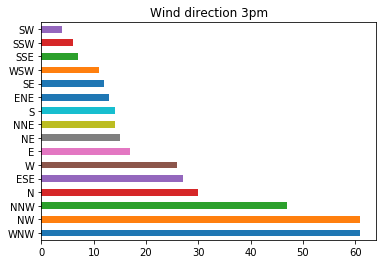

In [8]:
# plot wind direction 3pm
data.WindDir3pm.value_counts().plot(kind='barh')
plt.title('Wind direction 3pm')
plt.show()

In [7]:
# convert categorical data to numerical data
data['RainToday'] = data['RainToday'].apply(lambda x:1 if x == "Yes" else 0)

In [8]:
# convert categotical data to muneric data
data['RainTomorrow'] = data['RainTomorrow'].apply(lambda x:1 if x == "Yes" else 0)

In [9]:
# check the conversion from head
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8,1
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0


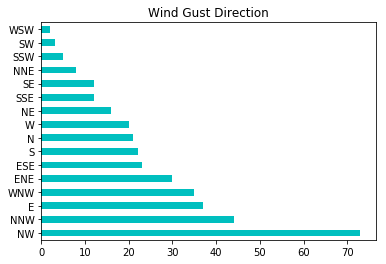

In [10]:
# plot for the windGustDir
data.WindGustDir.value_counts().plot(kind='barh', color='c')
plt.title('Wind Gust Direction')
plt.show()

In [11]:
# instantiate Label encoder
le = LabelEncoder()

In [12]:
# remove missing values
data = data.dropna()

In [13]:
# check the shape again wether it has removed missed value
data.shape

(328, 24)

In [14]:
# re-label the categorical features
data.WindGustDir = le.fit_transform(data.WindGustDir)
data.WindDir3pm = le.fit_transform(data.WindDir3pm)
data.WindDir9am = le.fit_transform(data.WindDir9am)

In [85]:
# check the datas wether it has been converted
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,...,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.0,328.000000,328.0
mean,7.742988,20.897561,1.440854,4.702439,8.014939,6.192073,40.396341,7.067073,7.512195,10.414634,...,44.003049,1019.350000,1016.530793,3.905488,4.000000,12.815549,19.556402,0.0,1.422561,0.0
std,5.945199,6.707310,4.289427,2.681183,3.506646,4.337765,13.132176,3.897197,4.560819,7.811544,...,16.605975,6.715244,6.469774,2.974957,2.652101,5.542521,6.644311,0.0,4.234023,0.0
min,-5.300000,7.600000,0.000000,0.200000,0.000000,0.000000,13.000000,0.000000,0.000000,2.000000,...,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.0,0.000000,0.0
25%,2.850000,15.500000,0.000000,2.550000,6.000000,2.000000,31.000000,3.000000,4.000000,6.000000,...,32.000000,1014.800000,1012.400000,1.000000,1.000000,8.175000,14.500000,0.0,0.000000,0.0
50%,7.900000,20.400000,0.000000,4.400000,8.750000,6.500000,39.000000,7.500000,7.000000,7.000000,...,42.500000,1019.750000,1016.900000,4.000000,4.000000,13.500000,18.850000,0.0,0.000000,0.0
75%,12.800000,25.800000,0.200000,6.600000,10.700000,8.000000,46.000000,10.000000,13.000000,13.000000,...,54.000000,1024.300000,1021.125000,7.000000,7.000000,17.200000,24.225000,0.0,0.200000,0.0
max,20.900000,35.800000,39.800000,13.800000,13.600000,15.000000,98.000000,15.000000,15.000000,41.000000,...,93.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,0.0,39.800000,0.0


In [15]:
# separate Inputs from outputs
x = data.drop(['Date', 'Location', 'RainTomorrow'], axis=1)
# outputs or labels
y = data['RainTomorrow']

In [16]:
train_x , train_y , test_x , test_y = train_test_split(
    x , y, test_size=0.2, random_state=2)

In [17]:
# check the size of input train data
train_x.shape


(262, 21)

In [18]:
# check the size of the output train data
train_y.shape

(66, 21)

In [19]:
# instantiate Logistics Regression
model = LogisticRegression()

In [20]:
model.fit(train_x, test_x)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
#make a prediction
predict = model.predict(train_y)

In [24]:
# check the accuracy score
accuracy_score(predict, test_y)

0.9696969696969697

In [26]:
# instantiate SVC
svm_model = SVC()

In [27]:
# train with SVC
svm_model.fit(train_x, test_x)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [66]:
# make prediction with SVC
predict3 = svm_model.predict(train_y)

In [67]:
# check accuracy score of SVC
accuracy_score(predict3, test_y)

0.8333333333333334

In [32]:
# Instantiate KNN
clf = KNeighborsClassifier()

In [33]:
# train with KNN
clf.fit(train_x, test_x)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [60]:
# make predicition with KNNs
predict4 = clf.predict(train_y)

In [61]:
# check accuracy score
accuracy_score(predict4, test_y)

0.8939393939393939

In [62]:
# Instantiate RandomForest
rf = RandomForestClassifier(max_depth=4)

In [63]:
# train with RandomForestCassifier
rf.fit(train_x, test_x)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
# make prediction with RandomForest
predict5 = rf.predict(train_y)

In [68]:
# check the accuracy score
accuracy_score(predict5, test_y)

1.0